In [1]:
%load_ext autoreload
%autoreload 2
from ds_utils.ds_preamble import *
from ds_utils.ds_helper import *
from ds_utils.ds_plotting import *
# from glob import glob
# import re
# import datetime
# import duckdb
# import pathlib
# from ds_utils.ds_preamble import *  # # self-defined module
# from ds_utils.ds_helper import *  # self-defined module
# from ds_utils.ds_plotting import *  # # self-defined module

tips = sns.load_dataset('tips')
tips_tiny = tips.sample(20)

df = tips 

titanic = sns.load_dataset('titanic')

np.random.seed(123)
tips['decile'] = np.random.randint(1,4, size=len(tips))

train = tips.sample(frac=0.7, random_state=30).reset_index(drop=True)
test = tips.drop(train.index).reset_index(drop=True)
survey = pd.read_csv("/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/data/stack-overflow-developer-survey-2019/survey_results_public.csv").sample(10_000)

# import importlib
# importlib.reload(ds_preamble)


calling ds_preamble..
calling ds_helper...


In [42]:
# dir(stats.norm)

stats.norm.pdf([0,1])

stats.norm.cdf([-1.645, 0])
stats.norm.ppf([0.05,0.5]) # 0.05 quantile

stats.norm.sf([-1.645, 0])
stats.norm.isf([0.05, 0.5]) # 0.05 quantile

stats.norm.stats()
X = stats.norm(1, 0.5)
X.mean()
X.var()
X.std()
X.median()

[X.moment(n) for n in range(5)]


stats.norm.interval(0.95)
stats.norm.ppf([0.025,0.975]) # same as above

array([0.39894228, 0.24197072])

array([0.04998491, 0.5       ])

array([-1.64485363,  0.        ])

array([0.95001509, 0.5       ])

array([1.64485363, 0.        ])

(array(0.), array(1.))

1.0

0.25

0.5

1.0

[1.0, 1.0, 1.25, 1.75, 2.6875]

(-1.959963984540054, 1.959963984540054)

array([-1.95996398,  1.95996398])

3.0

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18.])

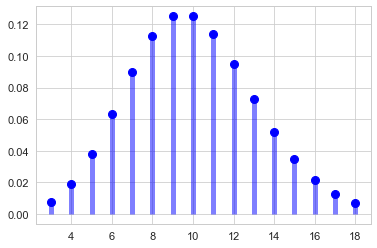

In [84]:
from scipy.stats import poisson
poi = stats.poisson(mu=10)

mu=10
fig, ax = plt.subplots(1, 1)
poisson.ppf(0.01, mu)
# x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
x = np.arange(*poisson.interval(0.99, mu))
x
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

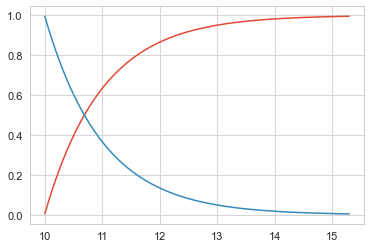

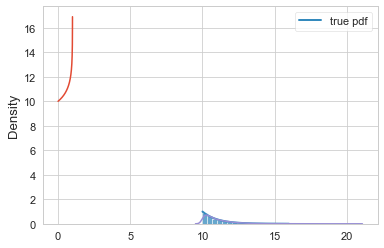

In [170]:
# remember: to do exponential \lambda * e^{-\lambda x}, we need to set loc=1/lambda, since loc is the mean!

y = stats.expon(10) # mean is 10


n = 100_000
# plt.hist(y.rvs(n), density=True, bins=50)
# plt.plot(, y.pdf(x))
# plt.xlabel('val')
# plt.ylabel('density')


# x=np.linspace(y.ppf(0.01), y.ppf(0.99), 1000)
# x=np.linspace(*y.interval(0.99), 1000)
# sns.lineplot(x=x, y=y.pdf(x))
# sns.histplot(y.rvs(n), stat='density', bins=40).set(xlabel='val')

# sns.lineplot(y.cdf())

# y.cdf(2)

x = np.linspace(*y.interval(0.99), 1000)
# y.cdf(np.linspace(*y.interval(0.99), 1000))
plt.plot(x, y.cdf(x))
plt.plot(x, y.sf(x))

plt.figure()
plt.plot(x:=np.linspace(0,1,1000), y.ppf(x))

sns.lineplot(x= (x:=np.linspace(*y.interval(0.995),1000)), y=y.pdf(x), label='true pdf', linewidth=2)
sns.histplot(y.rvs(100_00), stat='density', bins=30)
sns.kdeplot(y.rvs(100_00), label='kde')

In [144]:
# sns.__version__

'0.11.2'

<AxesSubplot:>

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'val')

[Text(0.5, 0, 'val'), Text(0, 0.5, 'prop')]

[Text(0.5, 0, 'quantile'), Text(0, 0.5, 'val')]

/Users/whlin/miniforge3/envs/data_science/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

[Text(0.5, 0, 'val')]

<AxesSubplot:>

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'val')

[Text(0.5, 0, 'val'), Text(0, 0.5, 'prop')]

[Text(0.5, 0, 'quantile'), Text(0, 0.5, 'val')]

/Users/whlin/miniforge3/envs/data_science/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

[Text(0.5, 0, 'val')]

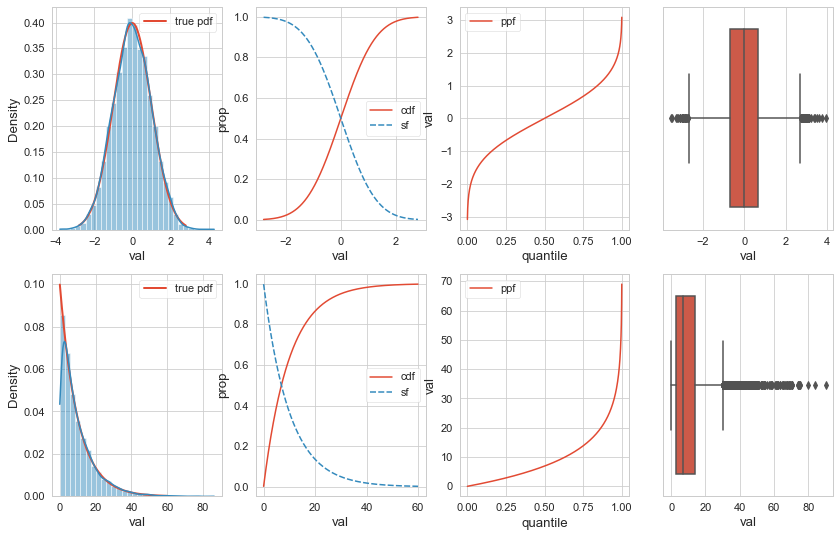

In [201]:
n_samples = 10**4
dists=[stats.norm(0,1), stats.expon(scale=10)]

fig, axes = plt.subplots(len(dists),4, figsize=(14,9))


for i, dist in enumerate(dists):
    x = np.linspace(*dist.interval(0.995),n_samples)
    
    sns.lineplot(x=x, y=dist.pdf(x), label='true pdf', linewidth=2, ax=axes[i,0])
    sns.histplot(dist.rvs(n_samples), stat='density', kde=True, bins=30, ax=axes[i,0])
    axes[i,0].set_xlabel('val')
    
    # sns.kdeplot(dist.rvs(100_00), label='kde')
    
    data = pd.DataFrame({'cdf': dist.cdf(x), 'sf':dist.sf(x)}, index=x)
    # print(data)
    sns.lineplot(data=data, ax=axes[i,1]).set(xlabel='val', ylabel='prop')
    
    axes[i,2].plot(x:=np.linspace(0,1,1000), dist.ppf(x), label='ppf')
    axes[i,2].legend()
    axes[i,2].set(xlabel='quantile', ylabel='val')
    
    sns.boxplot(dist.rvs(n_samples),  ax=axes[i,3])
    axes[i,3].set(xlabel='val')

